**Name: Ramtin Moslemi**

**Student Number: 99170553**




# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [2]:
from sklearn.datasets import fetch_openml

# Using `fetch_openml`, download `Fashion-MNIST`
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
fashion_mnist = fetch_openml("Fashion-MNIST")
X, y = fashion_mnist['data'], fashion_mnist['target']
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [3]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets.
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=10000)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [4]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above.
#############################
# Your code goes here (4 points)
y_train = y_train.astype(int)
filter_classes = [0, 1, 7]
filtered_indices = np.isin(y_train, filter_classes)
x_train = x_train[filtered_indices].to_numpy()
y_train = y_train[filtered_indices]
y_train[y_train == 7] = 2   # change label 7 to 2
#############################

print(x_train.shape, y_train.shape)

(18017, 784) (18017,)


In [5]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above.
#############################
# Your code goes here (4 points)
y_test = y_test.astype(int)
filter_classes = [0, 1, 7]
filtered_indices = np.isin(y_test, filter_classes)
x_test = x_test[filtered_indices].to_numpy()
y_test = y_test[filtered_indices].to_numpy()
y_test[y_test == 7] = 2   # change label 7 to 2
#############################

print(x_test.shape, y_test.shape)

(2983, 784) (2983,)


## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [6]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, x):
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = x
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        #############################
        return self.output

    def backward(self, up_grad):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)
        down_grad = np.empty_like(up_grad)
        for index in range(up_grad.shape[0]):
            single_output, single_grad = self.output[index], up_grad[index]
            single_output = single_output.reshape(-1, 1)
            jacobian = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            down_grad[index] = np.dot(jacobian, single_grad)
        return down_grad
        #############################

    def step(self, optimizer):
      pass

### The `Linear` Layer

In [7]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)
        self.w = 0.10 * np.random.randn(in_dim, out_dim)
        self.b = np.zeros((1, out_dim))
        #############################
        self.dw = None
        self.db = None

    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        self.output = np.dot(inp, self.w) + self.b
        z = self.output
        #############################

        return z

    def backward(self, up_grad):
        # Calculate the gradient with respect to the weights
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        self.dw = np.dot(self.inp.T, up_grad)
        self.db = np.sum(up_grad, axis=0, keepdims=True)
        down_grad = np.dot(up_grad, self.w.T)
        #############################
        return down_grad

    def step(self, optimizer):
      # Update the layer's weights and biases
      # Update previous_w_update and previous_b_update accordingly
      #############################
      # Your code goes here (5 points)
      self.w = optimizer.get_next_update(self.w, self.dw)
      self.b = optimizer.get_next_update(self.b, self.db)
      #############################

### The `ReLU` Layer

In [8]:
class RelU:
    def __init__(self):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        self.output = np.maximum(0, inp)
        output = self.output
        #############################
        return output

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = up_grad.copy()
        down_grad[self.inp <= 0] = 0
        #############################
        return down_grad

    def step(self, optimizer):
      pass

### The `sigmoid` Layer

In [9]:
class Sigmoid:
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        self.out = 1 / (1 + np.exp(-inp))
        #############################
        return self.out

    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad = self.out * (1 - self.out) * up_grad
        #############################
        return down_grad

    def step(self, optimizer):
      pass

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [10]:
class CELoss():
    def __init__(self):
      pass

    def forward(self, pred, target):

        self.yhat = pred
        self.y = target
        m = self.y.shape[0]
        # Commpute and return the loss
        #############################
        # Your code goes here (8 points)
        # pred = np.clip(pred, 1e-7, 1-1e-7) # use for better stability
        losses = - np.log(np.sum(pred * target, axis=1, keepdims=True))
        self.loss = np.mean(losses)
        return self.loss
        #############################


    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        m = self.y.shape[0]
        grad = - self.y / (self.yhat * m)
        #############################
        return grad

## Optimizer

In this section, you'll implement an optimizer classes


In [11]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        return x - self.lr * dx
        #############################

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [12]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
        self.layers = layers
        self.losses  = []
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        for layer in self.layers:
            inp = layer.forward(inp)
        return inp
        #############################

    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def backward(self):
        # Start with loss function's gradient and
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        up_grad = self.loss_fn.backward()
        for layer in self.layers[::-1]:
            up_grad = layer.backward(up_grad)
        #############################

    def update(self):
        for layer in self.layers:
          layer.step(self.optimizer)

The following cell encodes training labels into a one-hot representation with 3 classes.

In [13]:
def onehot_enc(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

y_train = onehot_enc(y_train, 3)

In [14]:
def train(model, epochs, x, y):
    for n in range(epochs):
      # First do the forward pass. Next, compute the loss.
      # Then do the backward pass and finally, update the parameters.
      #############################
      # Your code goes here (4 points)
      z = model.forward(x)
      loss = model.loss(z, y)
      model.backward()
      model.update()
      #############################
      print(f"Loss at {n}: {loss:.3f}")

In [15]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
layers = [Linear(784, 50), RelU(), Linear(50, 50), RelU(), Linear(50, 3), Sigmoid(), SoftMaxLayer()]

nn = MLP(layers, CELoss(), GradientDescent(0.001))
#############################

epochs = 50

# Train the network using only `x_train` and `y_train` (no validation)
train(nn, epochs, x_train, y_train)

Loss at 0: 1.116
Loss at 1: 1.113
Loss at 2: 1.111
Loss at 3: 1.108
Loss at 4: 1.105
Loss at 5: 1.102
Loss at 6: 1.099
Loss at 7: 1.096
Loss at 8: 1.093
Loss at 9: 1.090
Loss at 10: 1.088
Loss at 11: 1.085
Loss at 12: 1.082
Loss at 13: 1.079
Loss at 14: 1.076
Loss at 15: 1.073
Loss at 16: 1.070
Loss at 17: 1.068
Loss at 18: 1.065
Loss at 19: 1.062
Loss at 20: 1.059
Loss at 21: 1.056
Loss at 22: 1.053
Loss at 23: 1.051
Loss at 24: 1.048
Loss at 25: 1.045
Loss at 26: 1.042
Loss at 27: 1.039
Loss at 28: 1.036
Loss at 29: 1.034
Loss at 30: 1.031
Loss at 31: 1.028
Loss at 32: 1.025
Loss at 33: 1.022
Loss at 34: 1.020
Loss at 35: 1.017
Loss at 36: 1.014
Loss at 37: 1.011
Loss at 38: 1.008
Loss at 39: 1.006
Loss at 40: 1.003
Loss at 41: 1.000
Loss at 42: 0.997
Loss at 43: 0.994
Loss at 44: 0.992
Loss at 45: 0.989
Loss at 46: 0.986
Loss at 47: 0.983
Loss at 48: 0.981
Loss at 49: 0.978


Let's plot the loss value for each iteration

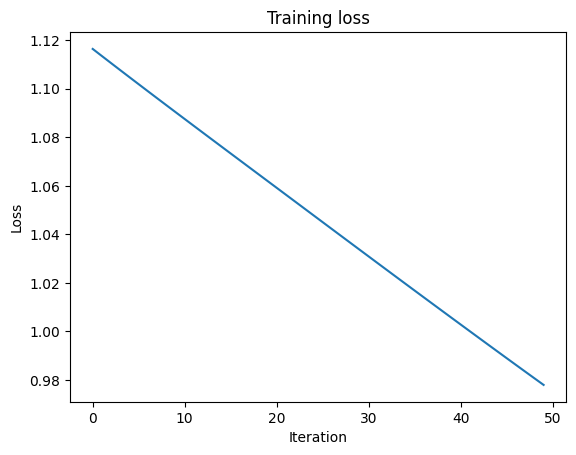

In [16]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [17]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)
pred = nn.forward(x_test)
y_pred = np.argmax(pred, axis=1)
acc = np.mean(y_pred == y_test)
#############################

print(acc)

0.7468990948709353


# Additional

In [18]:
# Removing the sigmoid layer and increasing learning rate and epochs improves model
layers = [Linear(784, 50), RelU(), Linear(50, 50), RelU(), Linear(50, 3), SoftMaxLayer()]
nn = MLP(layers, CELoss(), GradientDescent(0.01))
epochs = 100
train(nn, epochs, x_train, y_train)

Loss at 0: 1.080
Loss at 1: 1.030
Loss at 2: 0.985
Loss at 3: 0.943
Loss at 4: 0.903
Loss at 5: 0.866
Loss at 6: 0.830
Loss at 7: 0.797
Loss at 8: 0.765
Loss at 9: 0.736
Loss at 10: 0.709
Loss at 11: 0.683
Loss at 12: 0.659
Loss at 13: 0.636
Loss at 14: 0.615
Loss at 15: 0.595
Loss at 16: 0.576
Loss at 17: 0.559
Loss at 18: 0.542
Loss at 19: 0.526
Loss at 20: 0.511
Loss at 21: 0.497
Loss at 22: 0.483
Loss at 23: 0.470
Loss at 24: 0.458
Loss at 25: 0.447
Loss at 26: 0.435
Loss at 27: 0.425
Loss at 28: 0.415
Loss at 29: 0.405
Loss at 30: 0.396
Loss at 31: 0.387
Loss at 32: 0.378
Loss at 33: 0.370
Loss at 34: 0.362
Loss at 35: 0.355
Loss at 36: 0.348
Loss at 37: 0.341
Loss at 38: 0.334
Loss at 39: 0.328
Loss at 40: 0.321
Loss at 41: 0.315
Loss at 42: 0.310
Loss at 43: 0.304
Loss at 44: 0.299
Loss at 45: 0.294
Loss at 46: 0.289
Loss at 47: 0.284
Loss at 48: 0.279
Loss at 49: 0.274
Loss at 50: 0.270
Loss at 51: 0.266
Loss at 52: 0.262
Loss at 53: 0.258
Loss at 54: 0.254
Loss at 55: 0.250
Lo

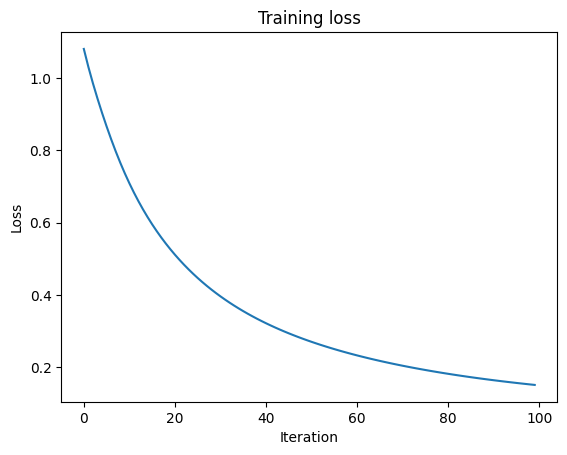

In [19]:
plt.plot(nn.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

In [20]:
pred = nn.forward(x_test)
y_pred = np.argmax(pred, axis=1)
acc = np.mean(y_pred == y_test)
print(acc)

0.9711699631243714
